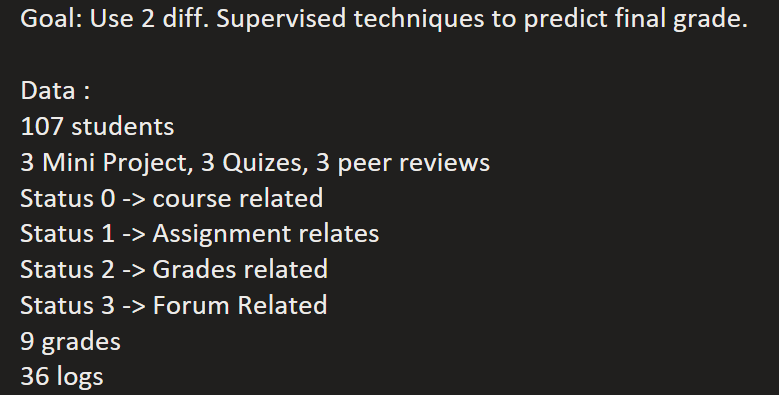![image.png](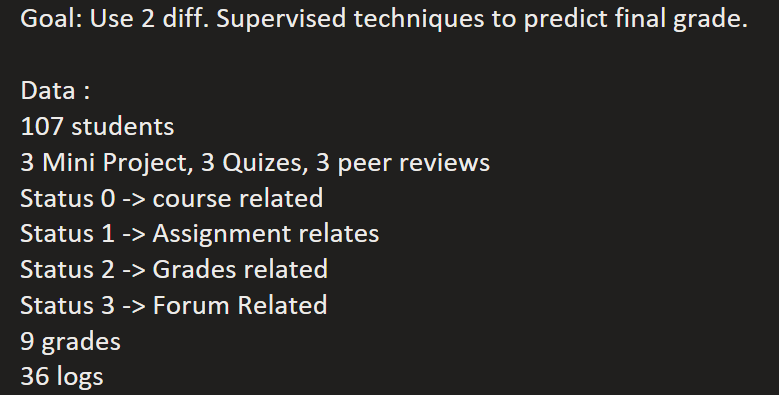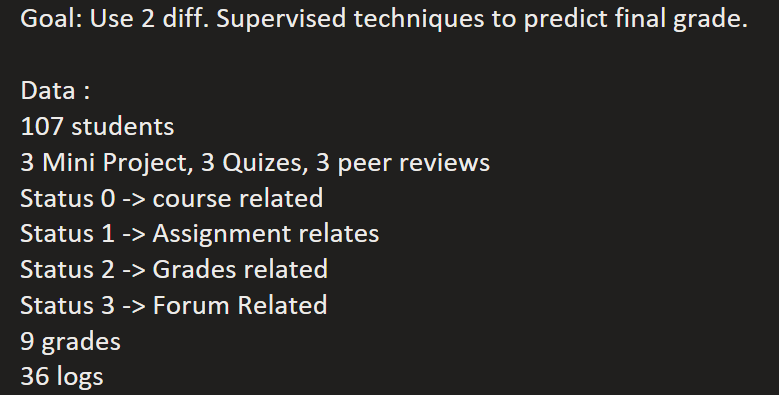)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Imports

In [ ]:
!pip install scipy==1.11.4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

!pip install scikit-plot
import scikitplot as skplt
import scikitplot.estimators as esti

# Step 0 : Reading CSV & Filtering Data

> Add blockquote



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MP2_Data.csv')


#remove collumn with all values 0
for column in df.columns:
      if df[column].eq(0).all():
          print(f"Removing column: {column}")
          df = df.drop(columns=[column])

#remove collumn id, Week8_Total
df = df.drop(['Week8_Total','ID'], axis=1)

# df.shape
df.head()


Removing column: Week1_Stat1


,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,0,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,8,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,4,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,12,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,6,...,6,8,5,1,1,5,3,1,0,2


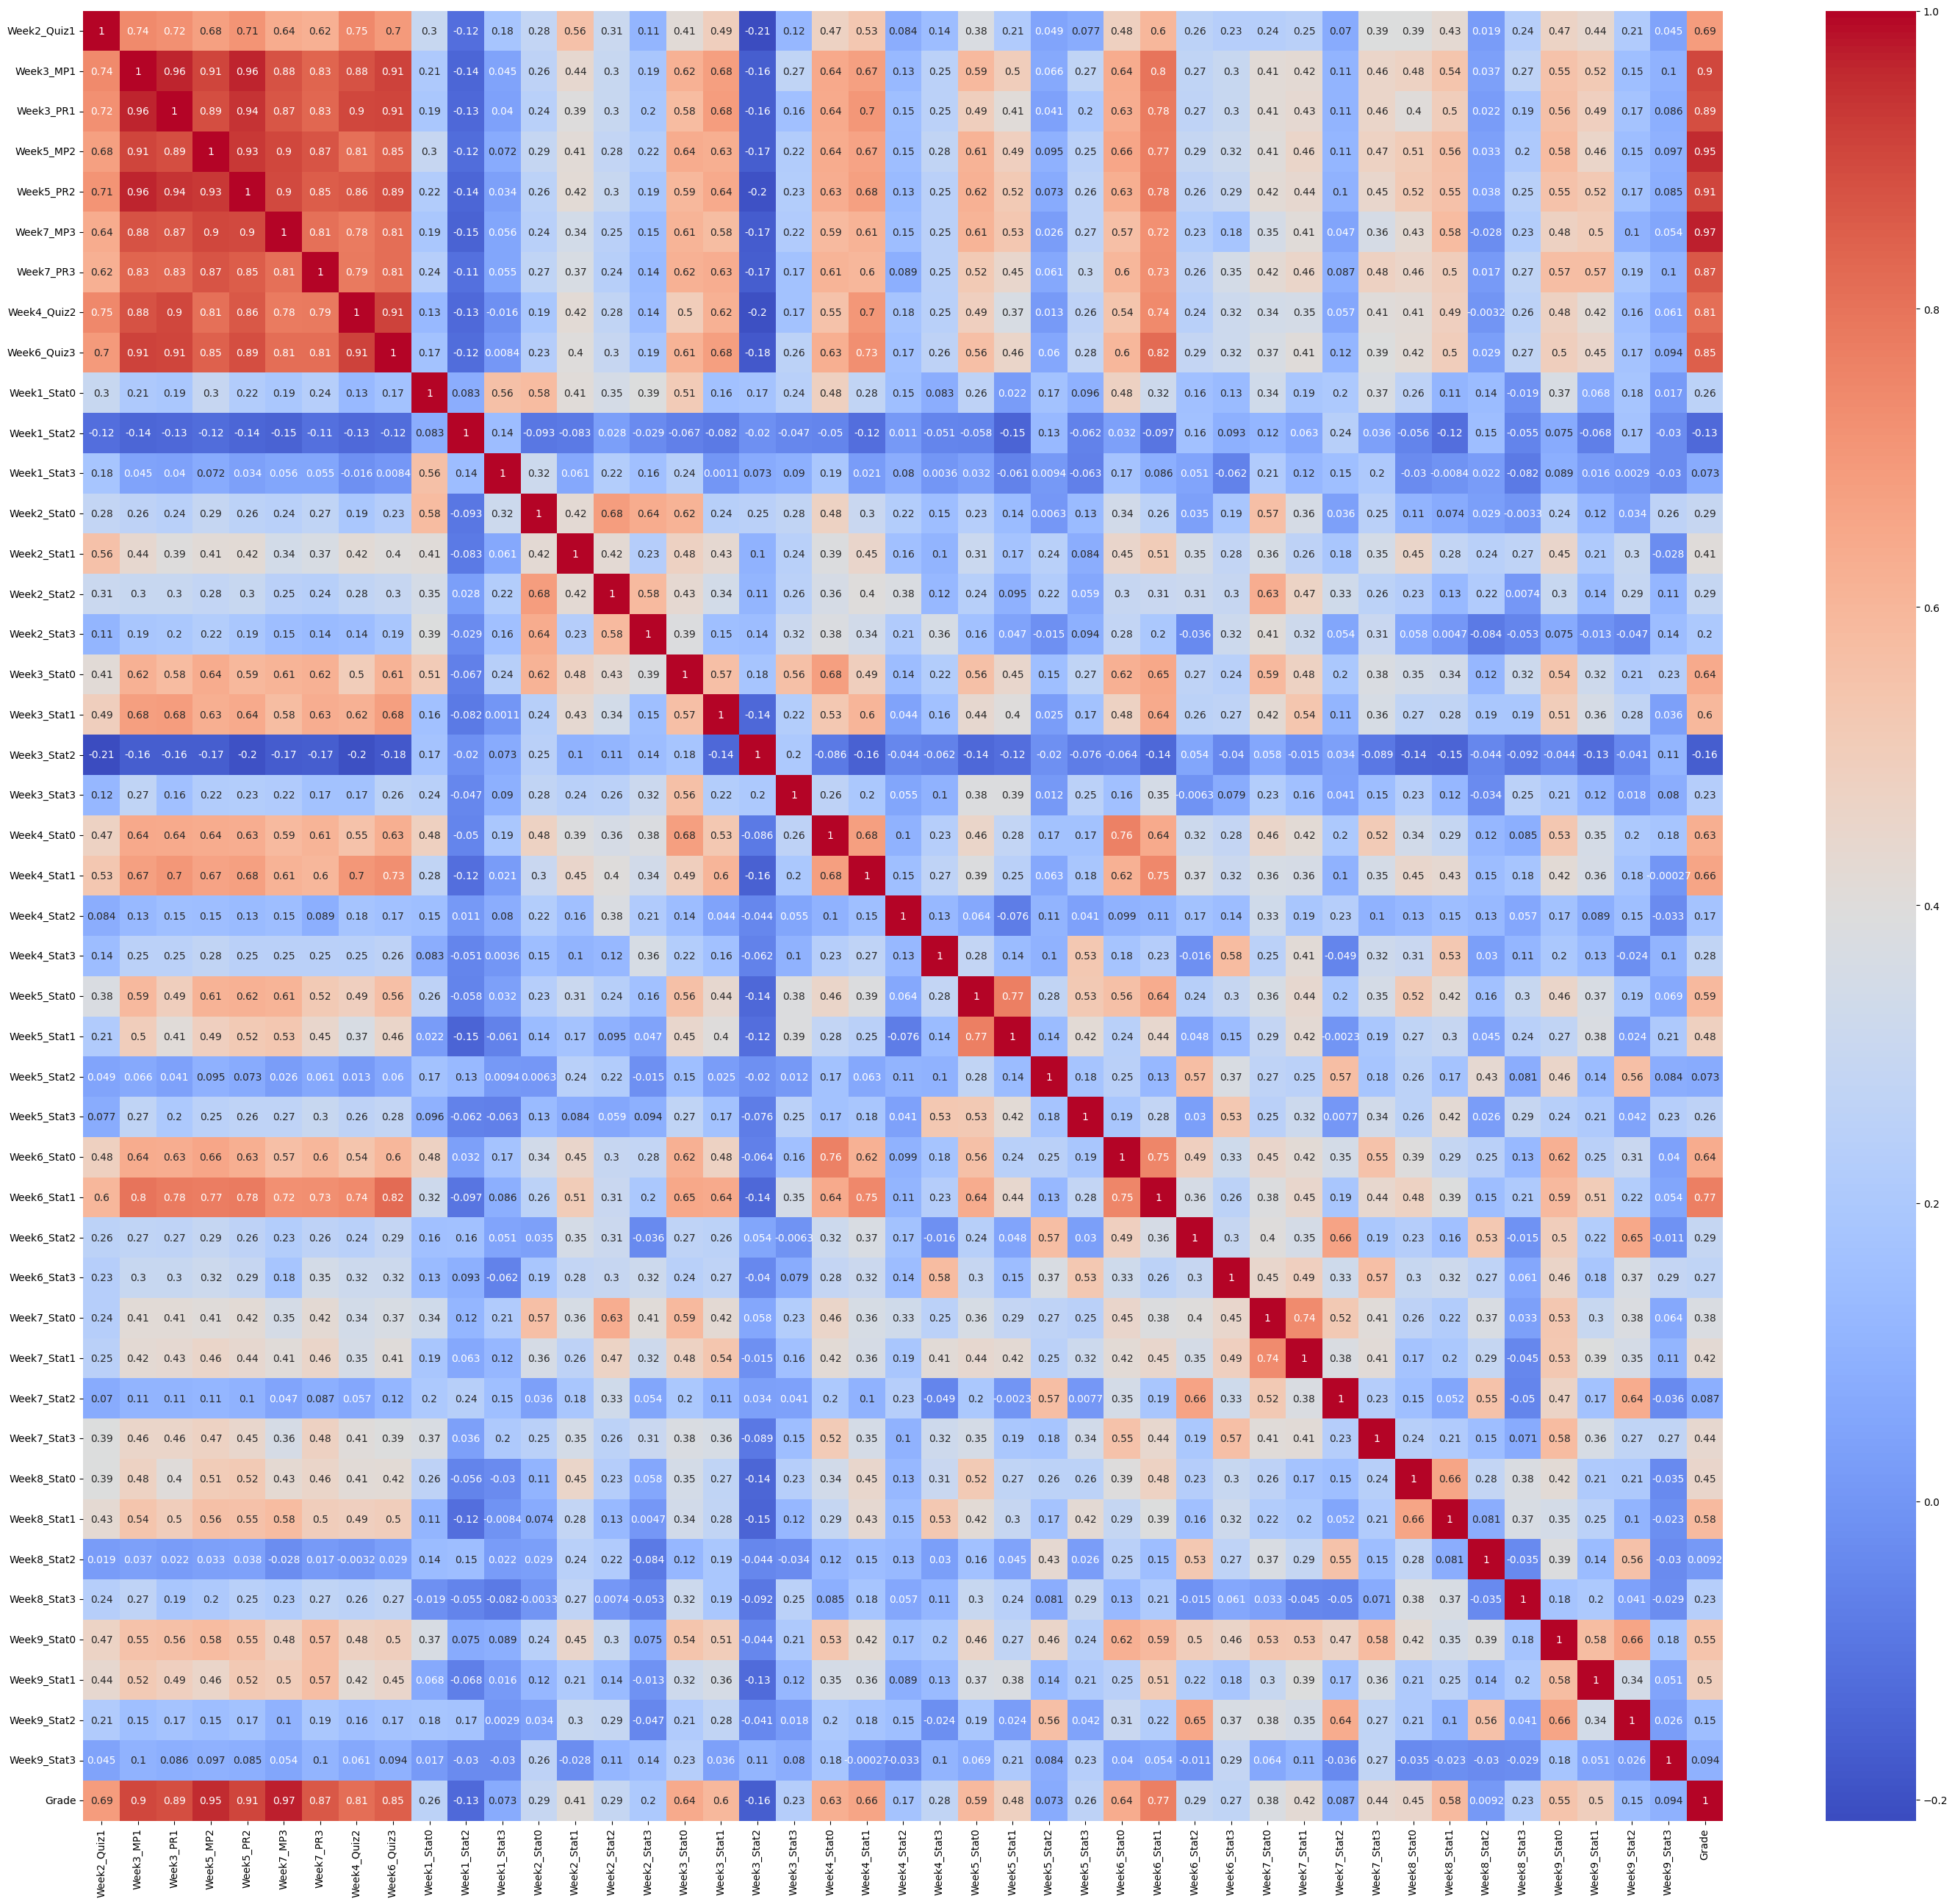

In [ ]:
#basic heatmap with all data
plt.figure(figsize=(36, 32))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data Processing & EDA

In [ ]:
#Create a collums Aggr_Quiz with aggregate of Week2_Quiz1, Week4_Quiz2, Week6_Quiz3
df['Aggr_Quiz'] = df[['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3']].sum(axis=1)

#Create a collums Aggr_MP with aggregate of Week3_MP1, Week5_MP2, Week7_MP3
df['Aggr_MP'] = df[['Week3_MP1', 'Week5_MP2', 'Week7_MP3']].sum(axis=1)

#Create a collumn aggr_PR of Week3_PR1, Week5_PR2, Week7_PR3
df['Aggr_PR'] = df[['Week3_PR1', 'Week5_PR2', 'Week7_PR3']].sum(axis=1)

#Create a collumn aggr_stat0 of Week1 to Week9
df['Aggr_Stat0'] = df[['Week1_Stat0','Week2_Stat0','Week3_Stat0','Week4_Stat0','Week5_Stat0','Week6_Stat0','Week7_Stat0','Week8_Stat0','Week9_Stat0']].sum(axis=1)

#Create a coolumn aggr_stat1 of Week1 to Week9
df['Aggr_Stat1'] = df[['Week2_Stat1','Week3_Stat1','Week4_Stat1','Week5_Stat1','Week6_Stat1','Week7_Stat1','Week8_Stat1','Week9_Stat1']].sum(axis=1)

#Create a collumn aggr_stat2 of week1 to week9
df['Aggr_Stat2'] = df[['Week1_Stat2','Week2_Stat2','Week3_Stat2','Week4_Stat2','Week5_Stat2','Week6_Stat2','Week7_Stat2','Week8_Stat2','Week9_Stat2']].sum(axis=1)

#Create a collumn aggr_stat3 of week1 to week9
df['Aggr_Stat3'] = df[['Week1_Stat3','Week2_Stat3','Week3_Stat3','Week4_Stat3','Week5_Stat3','Week6_Stat3','Week7_Stat3','Week8_Stat3','Week9_Stat3']].sum(axis=1)

#create a collumn aggr_stat of Aggr_stat1 to 3
df['Aggr_Stat'] = df[['Aggr_Stat0','Aggr_Stat1','Aggr_Stat2','Aggr_Stat3']].sum(axis=1)

#move grade collumn to last
grade_col = df.pop('Grade')
df.insert(len(df.columns), 'Grade', grade_col)




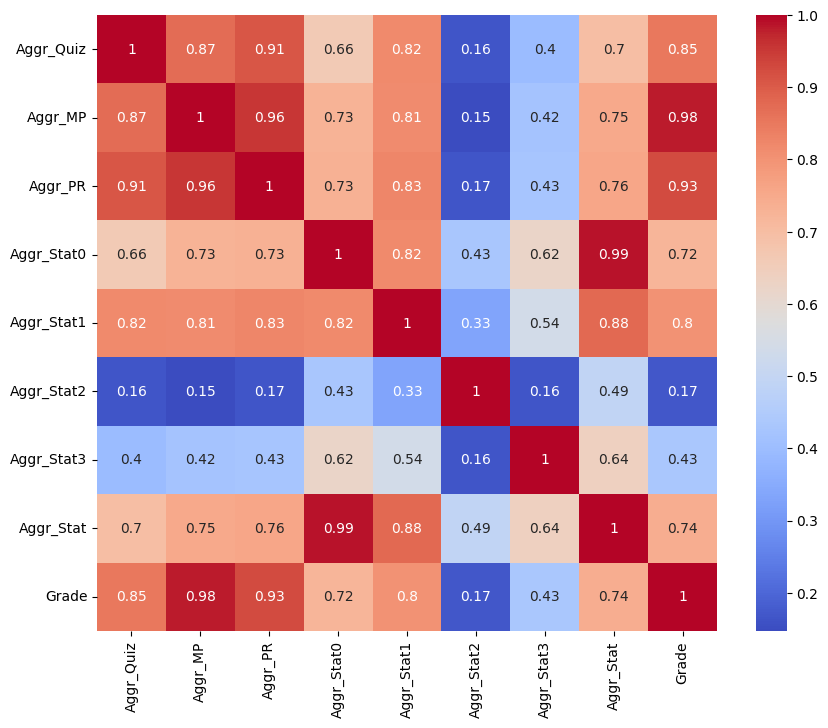

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Aggr_Quiz','Aggr_MP','Aggr_PR','Aggr_Stat0','Aggr_Stat1','Aggr_Stat2','Aggr_Stat3','Aggr_Stat','Grade']].corr(), annot=True, cmap='coolwarm')
plt.show()


# Feature Mapping with Grade

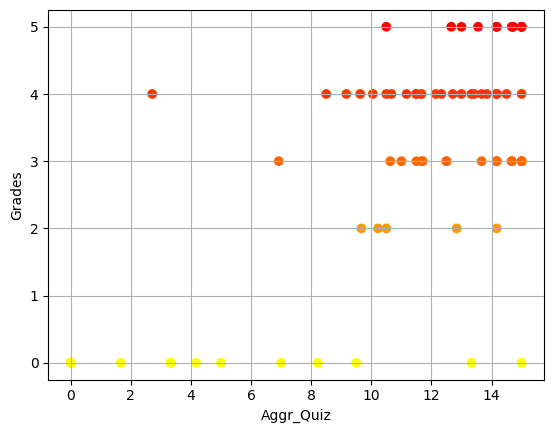

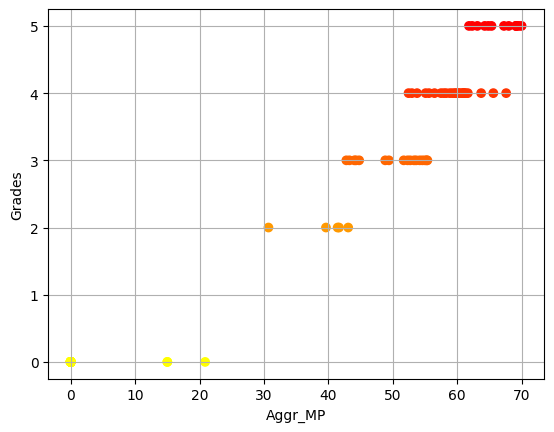

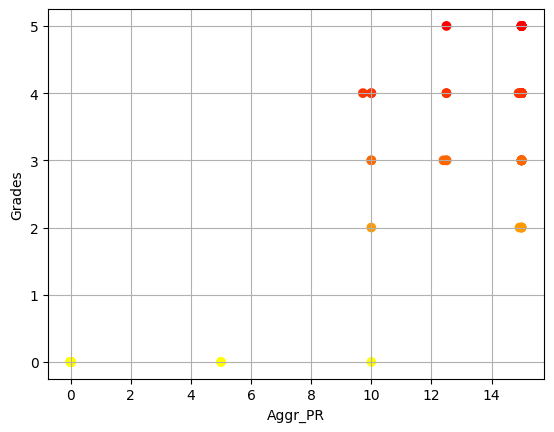

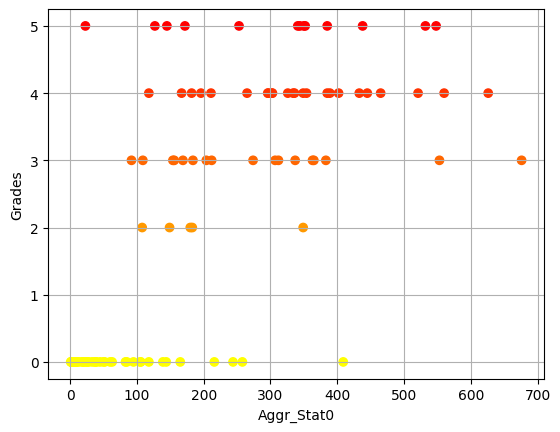

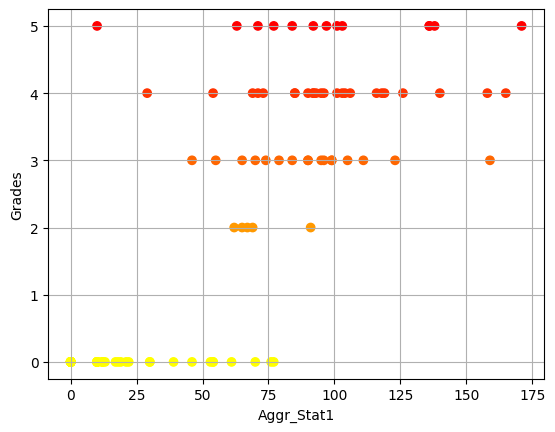

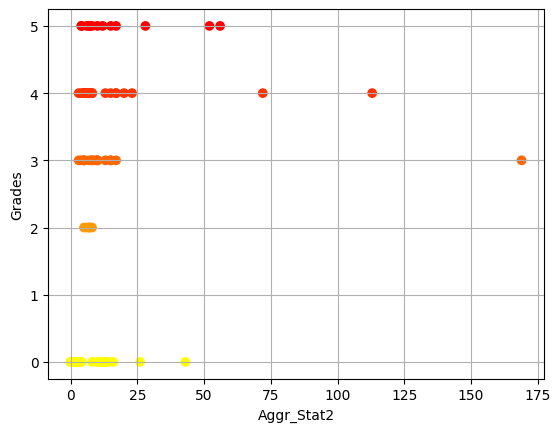

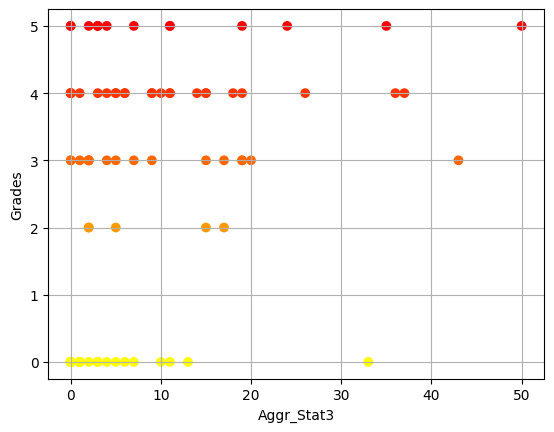

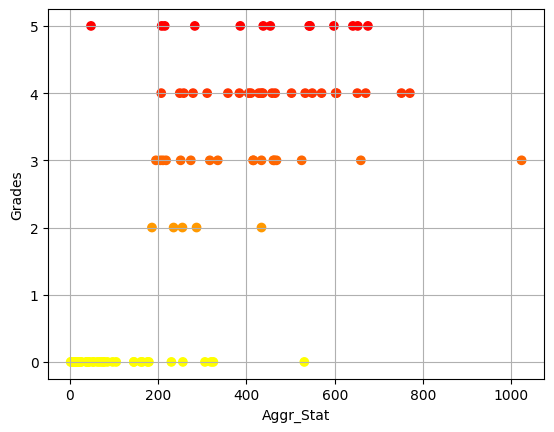

In [ ]:
# Plot the relation of each feature with each grade
def plot_feature_relation(column_name):
  plt.xlabel(column_name)
  plt.ylabel('Grades')

  pltX = df.loc[:, column_name]
  pltY = df.loc[:,'Grade']
  plt.scatter(pltX, pltY, c=pltY, cmap='autumn_r')

  plt.grid()
  plt.show()



plot_feature_relation('Aggr_Quiz')
plot_feature_relation('Aggr_MP')
plot_feature_relation('Aggr_PR')
plot_feature_relation('Aggr_Stat0')
plot_feature_relation('Aggr_Stat1')
plot_feature_relation('Aggr_Stat2')
plot_feature_relation('Aggr_Stat3')
plot_feature_relation('Aggr_Stat')

In [ ]:

def train_model(features, model_name):
  # X = feature values
  X = df[features]
  # y = target values
  y = df["Grade"]

  #Split the data into 80% training and 20% testing
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  #clf = SVC(kernel='poly', random_state=0)
  # clf = LogisticRegression()

  if model_name == 'knn':
    print("\n***** KNN *****\n")
    clf = KNeighborsClassifier(n_jobs=2)
  elif model_name == 'rf':
    print("\n******** RANDOM FORESTS MODEL ********\n")
    clf = RandomForestClassifier(n_jobs=2, random_state=5)

  clf.fit(x_train, y_train)

  #Test the model
  actual_target_values = y_test.values.tolist()
  print("Actual Values:    ", actual_target_values)
  predictions = clf.predict(x_test)
  print("Predicted Values: ", predictions.tolist())
  print()

  # plotting the learning curve
  print("Learning Curve:")
  esti.plot_learning_curve(clf, x_train, y_train)
  plt.show()

  #Confusion Matrix
  confusion_matrix = metrics.confusion_matrix(actual_target_values, predictions)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
  print("Confusion Matrix:")
  cm_display.plot()
  plt.show()

  #Check precision, recall, f1-score
  classify_report = classification_report(y_test, predictions, zero_division=0)
  print("\nClassification Report:\n", classify_report)
  acc_score = accuracy_score(y_test, predictions)
  print("Accuracy Score: ", acc_score)

  if model_name == 'rf':
    #Feature Importances
    feature_importances = list(zip(x_train, clf.feature_importances_))
    print("Feature Importances:", *feature_importances, sep='\n')



# Testing with features : Aggr stat0, stat1, stat2 ,stat3


***** KNN *****

Actual Values:     [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 0, 3, 5, 5]
Predicted Values:  [3, 0, 3, 0, 5, 4, 5, 4, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 4, 5, 0, 2]

Learning Curve:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


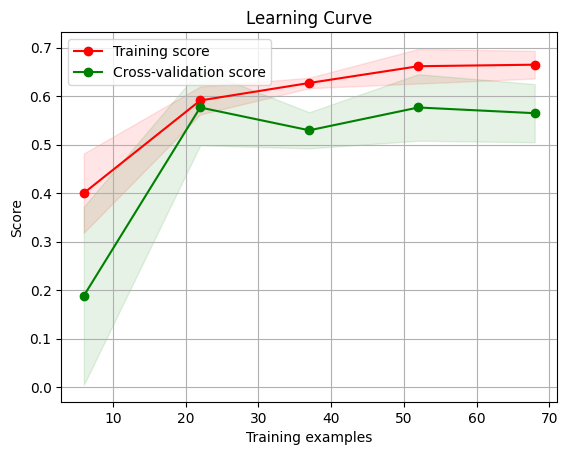

Confusion Matrix:


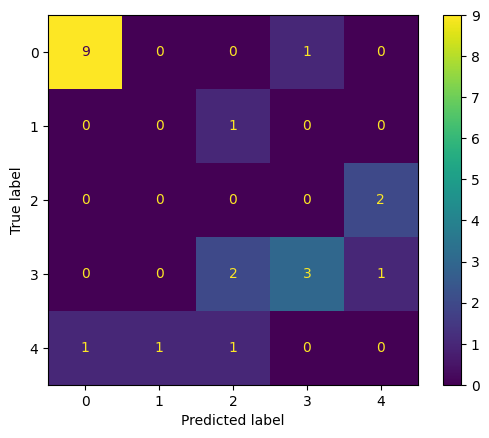


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      0.50      0.60         6
           5       0.00      0.00      0.00         3

    accuracy                           0.55        22
   macro avg       0.33      0.28      0.30        22
weighted avg       0.61      0.55      0.57        22

Accuracy Score:  0.5454545454545454


In [ ]:
# Aggregate Aggr stat0, stat1, stat2 ,stat3
features = ['Aggr_Stat0','Aggr_Stat1','Aggr_Stat2','Aggr_Stat3']
train_model(features,'knn')



******** RANDOM FORESTS MODEL ********

Actual Values:     [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 0, 3, 5, 5]
Predicted Values:  [3, 0, 3, 0, 2, 4, 4, 5, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 5, 0, 3]

Learning Curve:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


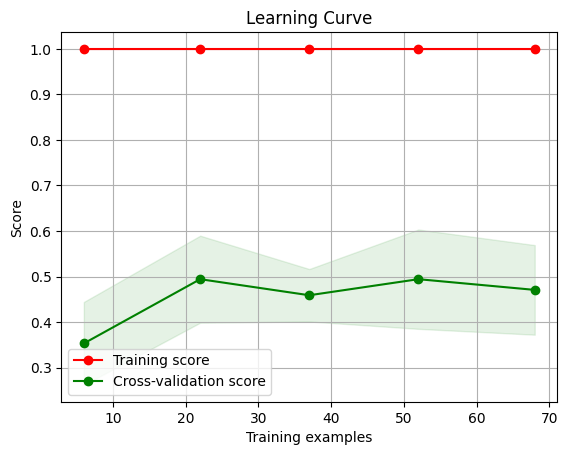

Confusion Matrix:


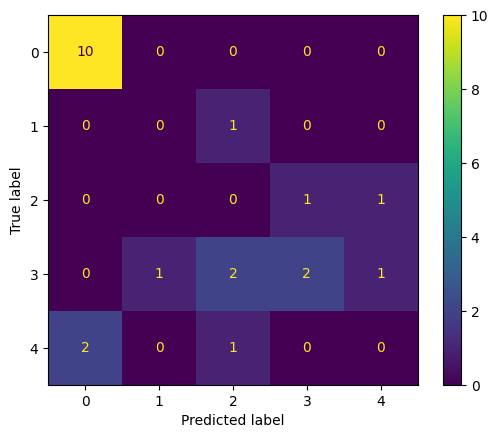


Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.67      0.33      0.44         6
           5       0.00      0.00      0.00         3

    accuracy                           0.55        22
   macro avg       0.30      0.27      0.27        22
weighted avg       0.56      0.55      0.53        22

Accuracy Score:  0.5454545454545454
Feature Importances:
('Aggr_Stat0', 0.3578858883034674)
('Aggr_Stat1', 0.35528357254136983)
('Aggr_Stat2', 0.139965043924544)
('Aggr_Stat3', 0.1468654952306188)


In [ ]:
# Aggregate Aggr stat0, stat1, stat2 ,stat3
features = ['Aggr_Stat0','Aggr_Stat1','Aggr_Stat2','Aggr_Stat3']
train_model(features,'rf')

# Testing with Features : Aggr stat, MP


***** KNN *****

Actual Values:     [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 0, 3, 5, 5]
Predicted Values:  [3, 0, 3, 0, 3, 3, 4, 4, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 0, 4, 0, 3]

Learning Curve:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


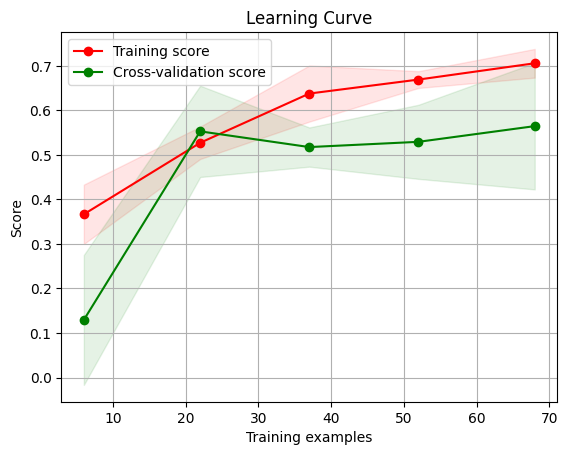

Confusion Matrix:


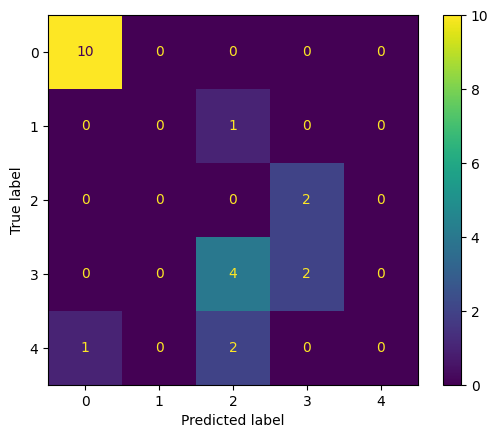


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.50      0.33      0.40         6
           5       0.00      0.00      0.00         3

    accuracy                           0.55        22
   macro avg       0.28      0.27      0.27        22
weighted avg       0.55      0.55      0.54        22

Accuracy Score:  0.5454545454545454


In [ ]:
# Aggregate Aggr stat, MP
features = ['Aggr_Stat','Aggr_MP']
train_model(features,'knn')


******** RANDOM FORESTS MODEL ********

Actual Values:     [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 0, 3, 5, 5]
Predicted Values:  [4, 0, 3, 0, 3, 4, 3, 4, 0, 0, 0, 5, 3, 0, 0, 0, 4, 0, 0, 3, 0, 4]

Learning Curve:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


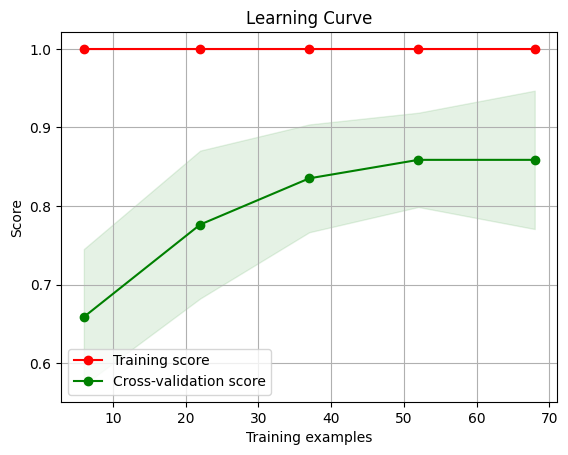

Confusion Matrix:


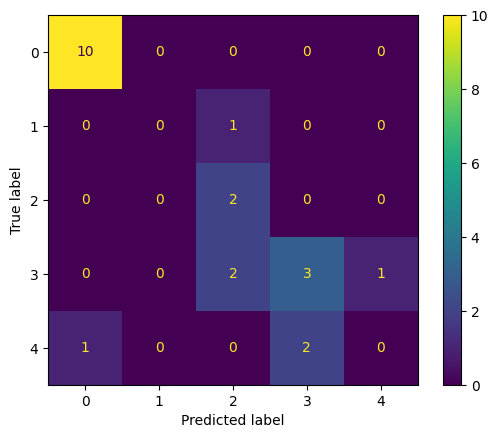


Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           2       0.00      0.00      0.00         1
           3       0.40      1.00      0.57         2
           4       0.60      0.50      0.55         6
           5       0.00      0.00      0.00         3

    accuracy                           0.68        22
   macro avg       0.38      0.50      0.41        22
weighted avg       0.61      0.68      0.63        22

Accuracy Score:  0.6818181818181818
Feature Importances:
('Aggr_Stat', 0.3493135208945229)
('Aggr_MP', 0.6506864791054772)


In [ ]:
features = ['Aggr_Stat','Aggr_MP']
train_model(features,'rf')

# Testing with features : Aggregate Quiz, MP, PR


***** KNN *****

Actual Values:     [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 0, 3, 5, 5]
Predicted Values:  [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 3, 0, 0, 0, 5, 0, 0, 3, 5, 4]

Learning Curve:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


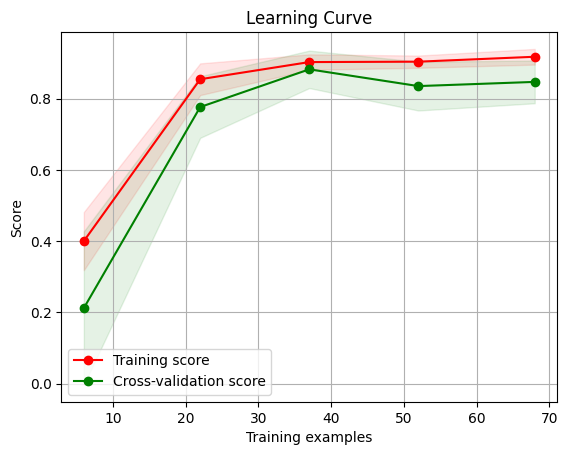

Confusion Matrix:


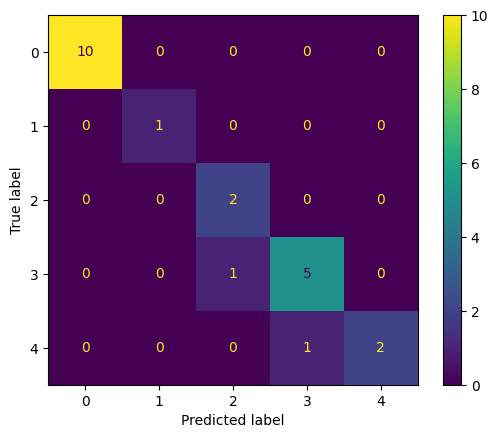


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.89        22
weighted avg       0.92      0.91      0.91        22

Accuracy Score:  0.9090909090909091


In [ ]:
# Aggregate Quiz, MP, PR
features = ['Aggr_Quiz','Aggr_MP','Aggr_PR']
train_model(features,'knn')


******** RANDOM FORESTS MODEL ********

Actual Values:     [4, 0, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 4, 0, 0, 0, 5, 0, 0, 3, 5, 5]
Predicted Values:  [4, 0, 3, 0, 4, 4, 3, 4, 0, 0, 0, 4, 3, 0, 0, 0, 5, 0, 0, 3, 4, 4]

Learning Curve:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


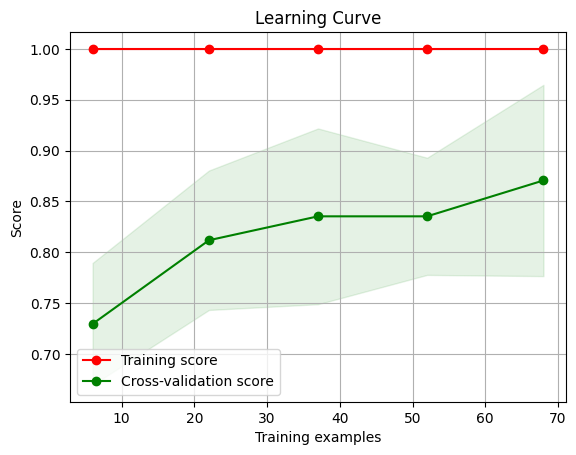

Confusion Matrix:


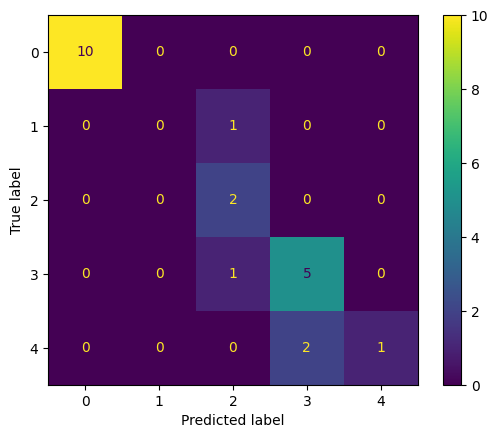


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         2
           4       0.71      0.83      0.77         6
           5       1.00      0.33      0.50         3

    accuracy                           0.82        22
   macro avg       0.64      0.63      0.59        22
weighted avg       0.83      0.82      0.79        22

Accuracy Score:  0.8181818181818182
Feature Importances:
('Aggr_Quiz', 0.25706353914223984)
('Aggr_MP', 0.5433237987018876)
('Aggr_PR', 0.19961266215587264)


In [ ]:
# Aggregate Quiz, MP, PR
features = ['Aggr_Quiz','Aggr_MP','Aggr_PR']
train_model(features,'rf')